In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Source image

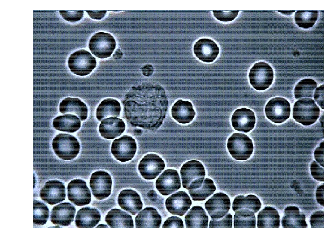

In [2]:
img = cv2.imread('images/1.jpg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Blurring  

## 1. Blur (averaging)

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element.

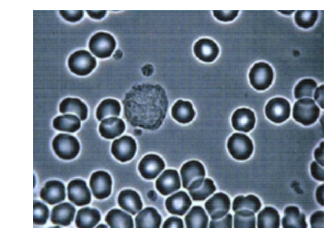

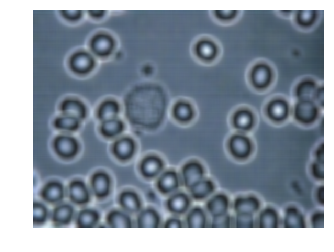

In [3]:
blur = cv2.blur(img, (7,7))
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.blur(img, (21,21))
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 2. Gaussian Blurring

In this, instead of box filter, gaussian kernel is used. It is done with the function, `cv2.GaussianBlur()`. We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

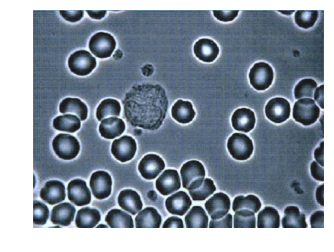

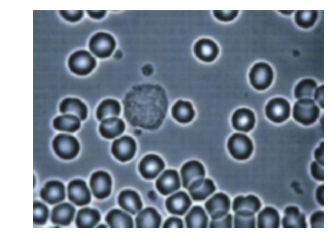

In [4]:
blur = cv2.GaussianBlur(img, (7,7), 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.GaussianBlur(img, (21,21), 0)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 3. Median Blurring

Here, the function `cv2.medianBlur()` takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

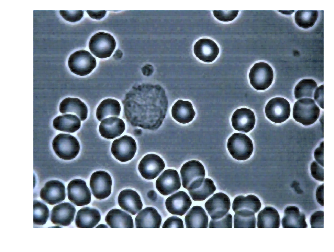

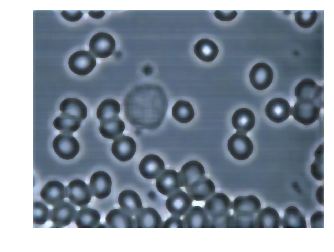

In [5]:
blur = cv2.medianBlur(img, 7)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.medianBlur(img, 21)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 4. Bilateral Filtering

`cv2.bilateralFilter()` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn’t consider whether pixels have almost same intensity. It doesn’t consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don’t want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

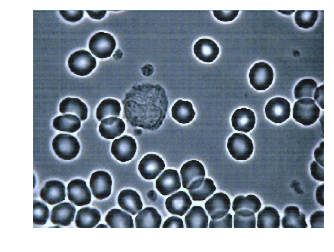

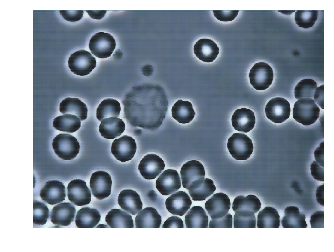

In [6]:
blur = cv2.bilateralFilter(img, 7, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.figure()

blur = cv2.bilateralFilter(img, 21, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## 5. Сombination (median + bilateral)

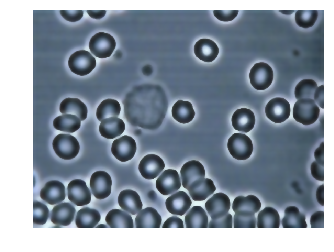

In [7]:
blur = cv2.medianBlur(img, 7)

blur = cv2.bilateralFilter(blur, 21, 255, 255)
plt.axis('off')
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()